Visão geral dos dados:
       Renda domiciliar per capita média do 1º quinto mais pobre   
count                                         111.000000          \
mean                                          186.575315           
std                                           164.339067           
min                                             0.570000           
25%                                            85.435000           
50%                                           143.790000           
75%                                           206.170000           
max                                           921.530000           

       Renda domiciliar per capita média do 2º quinto mais pobre   
count                                         111.000000          \
mean                                          550.096036           
std                                           491.448509           
min                                           155.820000           
25%                     

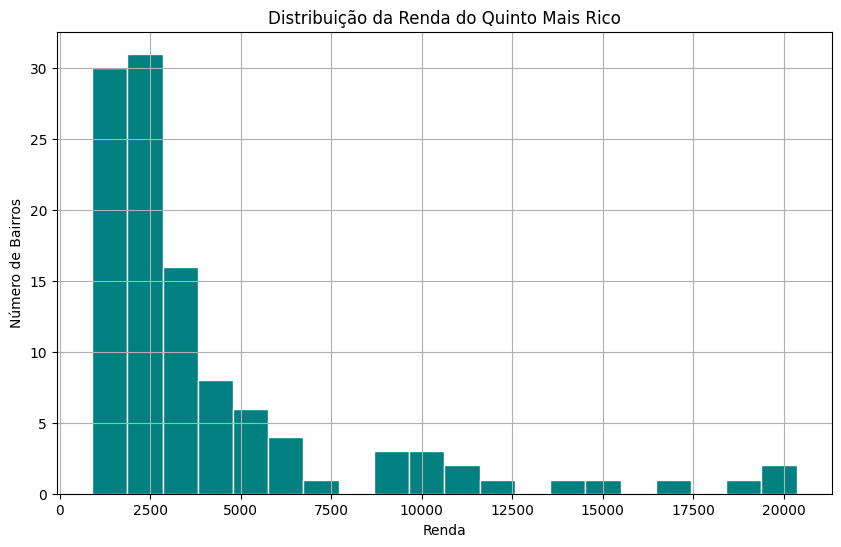

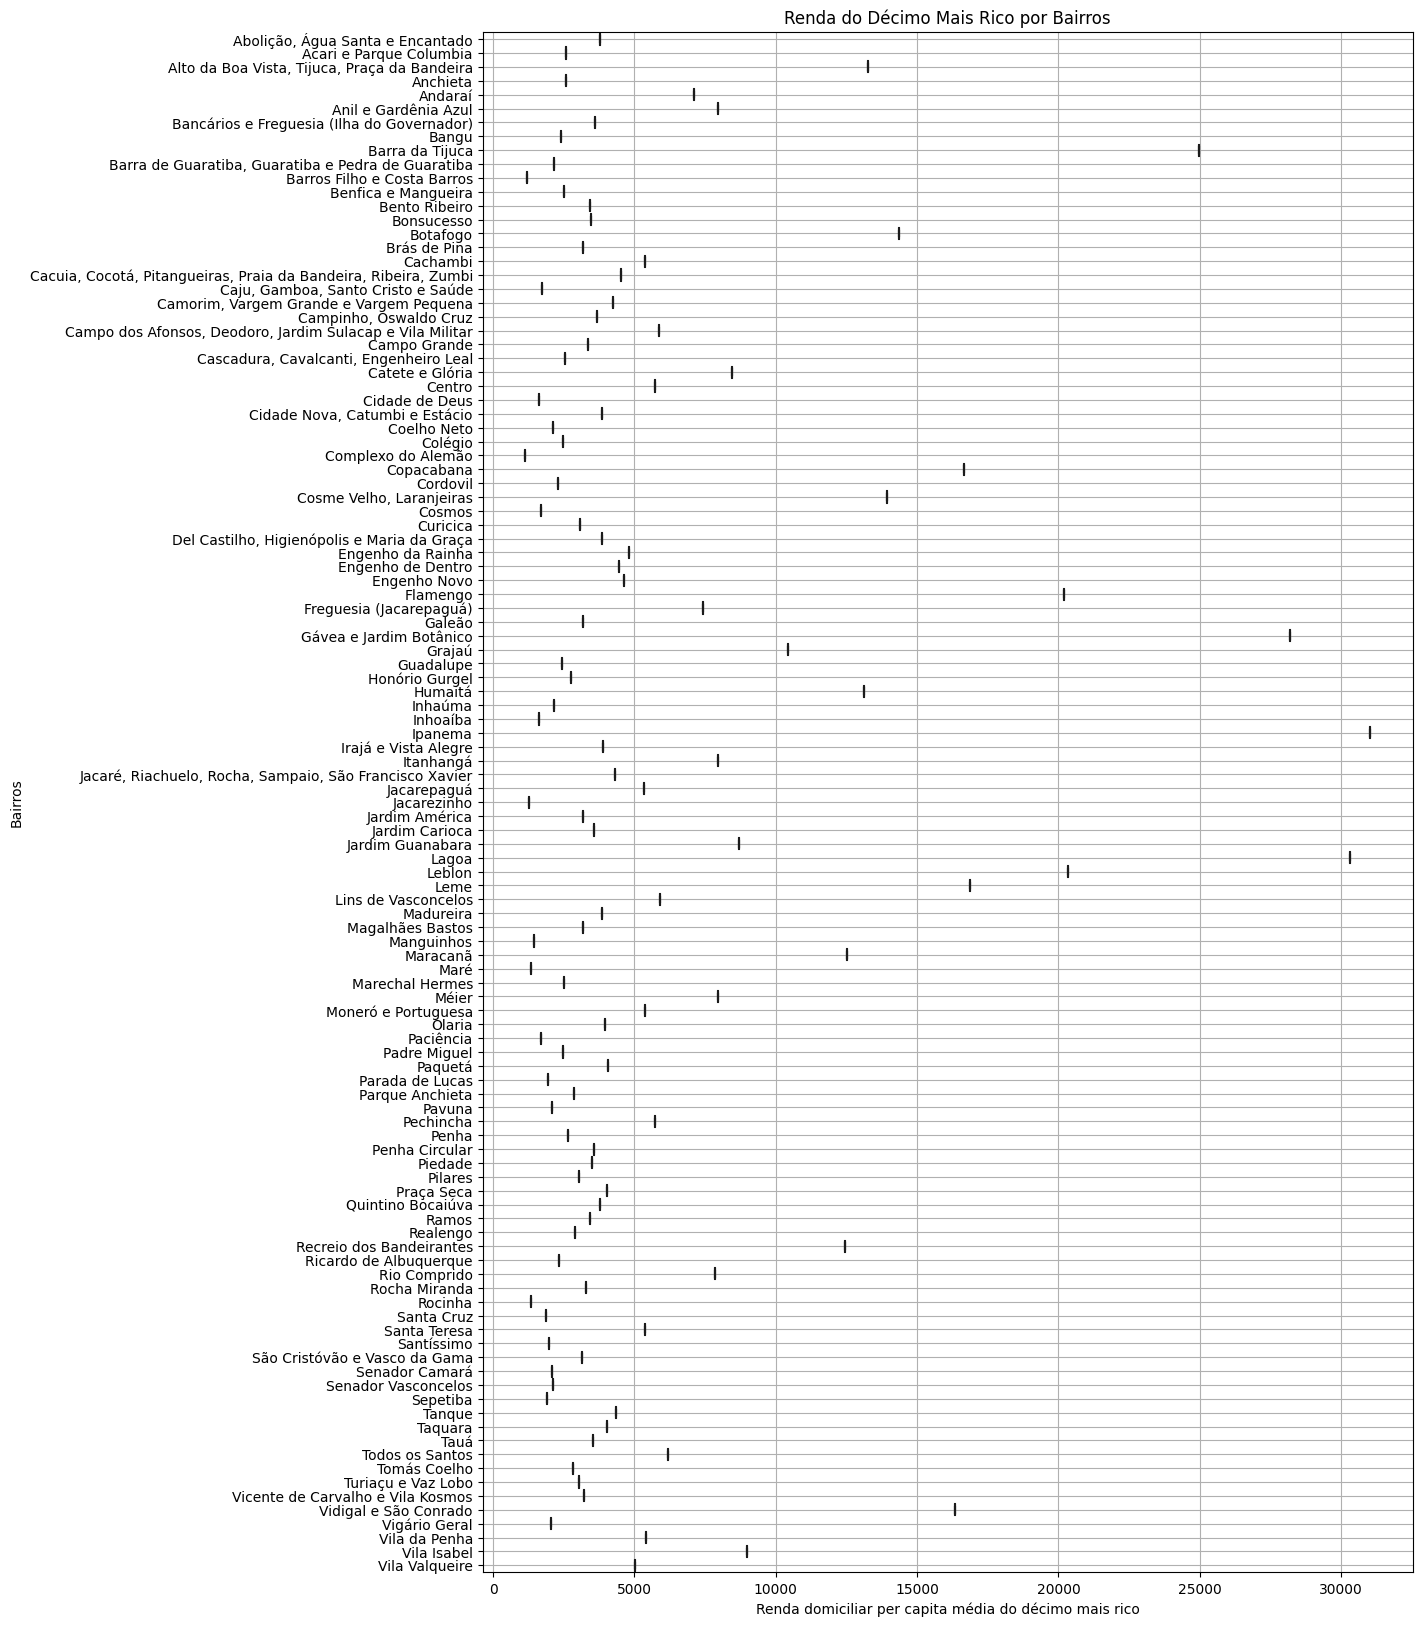

In [5]:
# Bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset
data_url = "https://github.com/simaoeirasantunes/database/raw/main/data.xls"
dataset = pd.read_excel(data_url)

# Lidar com valores ausentes
dataset.fillna(0, inplace=True)

# Mostrar estatísticas descritivas
print("Visão geral dos dados:")
print(dataset.describe())

# Agrupando os dados por Bairros e calculando a média
bairros_avg = dataset.groupby("Bairros").mean()
print("\nMédias por Bairros:")
print(bairros_avg)

# Somando os valores por Bairros
bairros_sum = dataset.groupby('Bairros').sum()
print("\nTotais por Bairros:")
print(bairros_sum)

# Extremos de renda por Bairros
bairros_extreme = dataset.groupby('Bairros')['Renda domiciliar per capita média do quinto mais rico'].agg(['min', 'max'])
print("\nValores extremos por Bairros:")
print(bairros_extreme)

# Dados de população para o exemplo de JOIN
pop_data = {
    'Bairros': ['Copacabana', 'Lapa', 'Ipanema', 'Leblon'],
    'População': [100000, 150000, 200000, 250000]
}
pop_df = pd.DataFrame(pop_data)

# Juntando os datasets
merged_dataset = dataset.merge(pop_df, on="Bairros", how='left')
print("\nDados após a combinação:")
print(merged_dataset)

# Visualizações

# Histograma da Renda do quinto mais rico
plt.figure(figsize=(10, 6))
plt.hist(dataset['Renda domiciliar per capita média do quinto mais rico'], bins=20, color='teal', edgecolor='white')
plt.title('Distribuição da Renda do Quinto Mais Rico')
plt.xlabel('Renda')
plt.ylabel('Número de Bairros')
plt.grid(True)
plt.show()

# Boxplot da Renda média do décimo mais rico por Bairros
plt.figure(figsize=(12, 20))
sns.boxplot(x='Renda domiciliar per capita média do décimo mais rico', y='Bairros', data=dataset, palette='viridis')
plt.title('Renda do Décimo Mais Rico por Bairros')
plt.grid(True)
plt.show()
